# Image Sharpening

## Learning Objectives
1. Learn how to read in images
2. Intro to numpy for multidimensional data
3. Learn about image averaging
4. Getting comfortable with images as matrices
5. Introduction to kernels

In [1]:
%matplotlib inline

from google.colab import files, drive    # upload
import numpy as np                       # mathematical calculations
from io import BytesIO                   # reading files
from PIL import Image             # image processing library
import matplotlib.pyplot as plt   # plotting library

In [2]:
drive.mount('drive')
img = Image.open("/content/drive/MyDrive/Colab Notebooks/Image Sharpening/keyboard.jpg")
im = np.array(img)

Mounted at drive


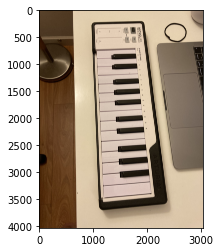

In [3]:
plt.imshow(im)

Let's get a cropped region of this cat

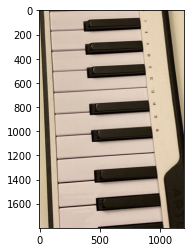

In [4]:
crop = im[1200:3000, 1000:2200]
plt.imshow(crop)

Let's get a greyscale versio of the cropped region

In [5]:
def greyscale(image):
  """
  Given a coloured rgb image, return the greyscale image.
  Input: 
    image - np array 3d

  Output:
    grey - np array 2d
  """
  # make a copy of the input image
  grey = 0.3*image[:,:,0] + 0.59*image[:,:,1] + 0.11*image[:,:,2]
  grey = grey/grey.max()
  return grey # [0,1]

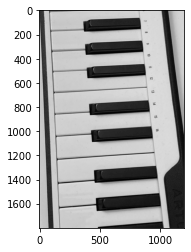

In [6]:
cat_img = greyscale(crop)
plt.imshow(cat_img, cmap="gray")

## Image Sharpening Roadmap

sharp details = original image - smoothed image



### Smoothing
- What is smoothing?
- Each pixel is the average of the ones around it!

Let's implement image smoothing

In [7]:
def smoother(image):
  """
  Takes in a greyscale image and returns the smoothed result.
  For each non border pixel i, calculate the average of it's surrounding including itself
  Set that average value to be the pixel value for pixel i in the smoothed image. 

  Input:
    image: 2d numpy array that we want to smooth

  Output:
    output: 2d numpy array that is the smoothed result
  """
  # Start off by setting the output to be a copy of the original
  output = image.copy()

  nrows = image.shape[0]
  ncols = image.shape[1]

  # For every non edge pixel, calculate it as the average of its surrounding and self
  # Save average value to same location in output image
  for x in range(1, nrows-1):
    for y in range(1, ncols-1):
      # Add each row
      avg  = image[x-1, y-1] + image[x-1, y] + image[x-1, y+1]
      avg += image[x, y-1] + image[x, y] + image[x, y+1] 
      avg += image[x+1, y-1] + image[x+1, y] + image[x+1, y+1]
      avg /= 9
      output[x,y] = avg
  return output


def edge_detect(image):
  """
  Takes in a greyscale image and returns the edge detected result. 
  Input:
    image: 2d numpy array that we want to smooth

  Output:
    output: 2d numpy array of detected edges
  """
  # Start off by setting the output to be a copy of the original
  output = image.copy()

  nrows = image.shape[0]
  ncols = image.shape[1]

  # For every non edge pixel, calculate it as the average of its surrounding and self
  # Save average value to same location in output image
  for x in range(1, nrows-1):
    for y in range(1, ncols-1):
      # Add each row
      avg  = 1*image[x-1, y-1]  + (-1)*image[x-1, y+1]
      avg += (-1)*image[x+1, y-1] + 1*image[x+1, y+1]
      output[x,y] = avg
  return np.abs(output)


def edge_detect2(image):
  """
  Takes in a greyscale image and returns the smoothed result.
  For each non border pixel i, calculate the average of it's surrounding including itself
  Set that average value to be the pixel value for pixel i in the smoothed image. 

  Input:
    image: 2d numpy array that we want to smooth

  Output:
    output: 2d numpy array that is the smoothed result
  """
  # Start off by setting the output to be a copy of the original
  output = image.copy()

  nrows = image.shape[0]
  ncols = image.shape[1]

  # For every non edge pixel, calculate it as the average of its surrounding and self
  # Save average value to same location in output image
  for x in range(1, nrows-1):
    for y in range(1, ncols-1):
      # Add each row
      avg  = 8*image[x, y]
      avg -= (image[x-1, y-1]+image[x-1, y] + image[x-1, y+1])
      avg -= (image[x+1, y-1]+image[x+1, y] + image[x+1, y+1])
      avg -= (image[x, y-1]+image[x, y+1])
      output[x,y] = avg
  return np.abs(output)


def edge_detect3(image):
  """
  Takes in a greyscale image and returns the smoothed result.
  For each non border pixel i, calculate the average of it's surrounding including itself
  Set that average value to be the pixel value for pixel i in the smoothed image. 

  Input:
    image: 2d numpy array that we want to smooth

  Output:
    output: 2d numpy array that is the smoothed result
  """
  # Start off by setting the output to be a copy of the original
  output = image.copy()

  nrows = image.shape[0]
  ncols = image.shape[1]

  # For every non edge pixel, calculate it as the average of its surrounding and self
  # Save average value to same location in output image
  for x in range(1, nrows-1):
    for y in range(1, ncols-1):
      # Add each row
      avg  = 4*image[x, y]
      avg -= image[x-1, y]
      avg -= (image[x+1, y])
      avg -= (image[x, y-1]+image[x, y+1])
      output[x,y] = avg
  return np.abs(output)


In [8]:
smoothed = smoother(cat_img) # np.float32
details = np.abs(cat_img - smoothed) # np.float32 - np.float32

In [9]:
d = 1
sharp = cat_img + d*details 

(-0.5, 1199.5, 1799.5, -0.5)

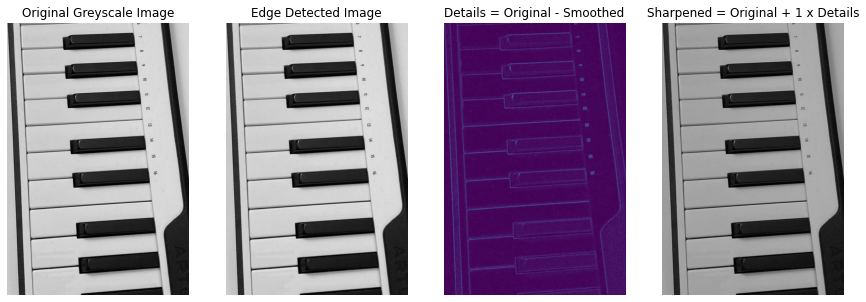

In [10]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=[15, 5])
ax1.set_title("Original Greyscale Image")
ax2.set_title("Edge Detected Image")
ax3.set_title("Details = Original - Smoothed")
ax4.set_title("Sharpened = Original + %d x Details" % d)

im1 = ax1.imshow(cat_img, cmap="gray")
im2 = ax2.imshow(np.abs(smoothed), cmap="gray")
im3 = ax3.imshow(details)
im4 = ax4.imshow(sharp/sharp.max(), cmap="gray")

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')

In [11]:
edges = edge_detect(cat_img)
edges2 = edge_detect2(cat_img)
edges3 = edge_detect3(cat_img)

(-0.5, 1199.5, 1799.5, -0.5)

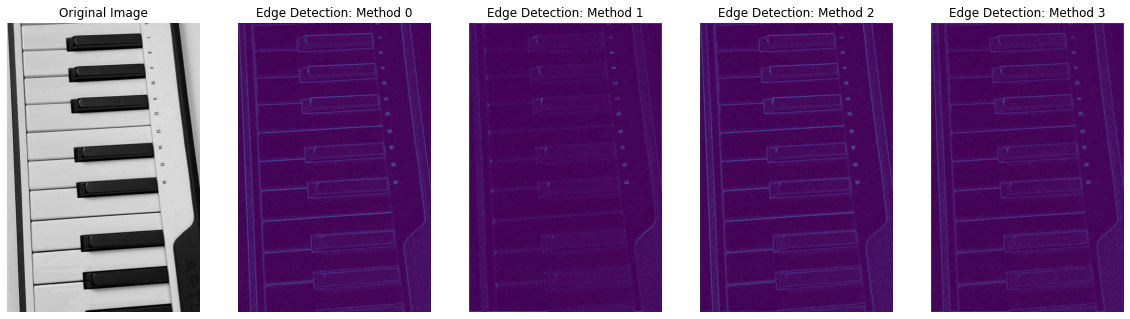

In [25]:
fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(1, 5, figsize=[20, 6])
ax0.set_title("Original Image")
ax1.set_title("Edge Detection: Method 0")
ax2.set_title("Edge Detection: Method 1")
ax3.set_title("Edge Detection: Method 2")
ax4.set_title("Edge Detection: Method 3")

im0 = ax0.imshow(cat_img, cmap='gray')
im1 = ax1.imshow(details)
im2 = ax2.imshow(edges)
im3 = ax3.imshow(edges2)
im4 = ax4.imshow(edges3)

ax0.axis('off')
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')

(-0.5, 1199.5, 1799.5, -0.5)

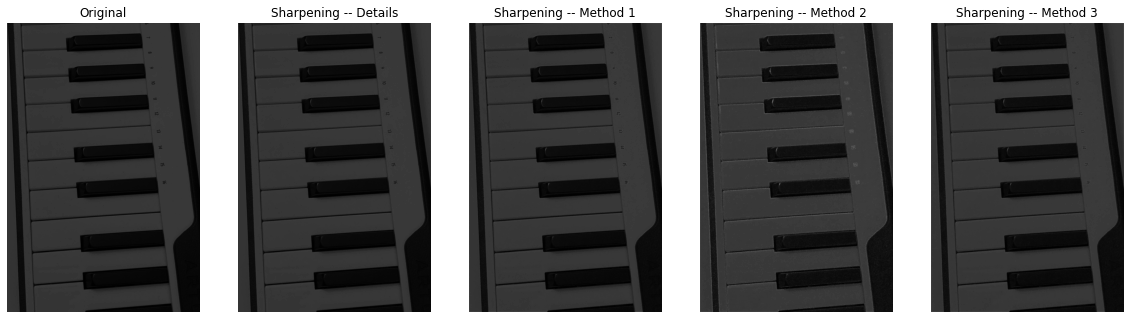

In [13]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=[20, 6])
ax1.set_title("Original")
ax2.set_title("Sharpening -- Details")
ax3.set_title("Sharpening -- Method 1")
ax4.set_title("Sharpening -- Method 2")
ax5.set_title("Sharpening -- Method 3")

emax = max(details.max(), edges.max(), edges2.max(), edges3.max())
emin = min(details.min(), edges.min(), edges2.min(), edges3.min())

im1 = ax1.imshow(cat_img, cmap="gray", vmax=cat_img.max()+emax, vmin=cat_img.min()+emin)
im2 = ax2.imshow(cat_img + details, cmap="gray", vmax=cat_img.max()+emax, vmin=cat_img.min()+emin)
im3 = ax3.imshow(cat_img + edges, cmap="gray", vmax=cat_img.max()+emax, vmin=cat_img.min()+emin)
im4 = ax4.imshow(cat_img + edges2, cmap="gray", vmax=cat_img.max()+emax, vmin=cat_img.min()+emin)
im5 = ax5.imshow(cat_img + edges3, cmap="gray", vmax=cat_img.max()+emax, vmin=cat_img.min()+emin)

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')
ax5.axis('off')

## Sharpening on RGB
Before, we've been sharpening on greyscale, but what if we want a colour channel to be more obvious than the others?

1. Pick out the colour channel we want to sharper  
2. Apply sharpening to that single colour channel
3. 
4. Merge back into RGB image when done

In [14]:
mod_r = crop[:,:,0].astype(np.float32)

In [15]:
mod_r = mod_r + 0.1*mod_r

In [16]:
mod_r.max()

280.5

In [17]:
mod_r = np.rint(255*mod_r/mod_r.max()).astype(np.uint8)
mod_r.max()

255

In [18]:
copy = crop.copy()

In [19]:
copy[:,:,0] = mod_r # replace with your sharpened red channel

(-0.5, 1199.5, 1799.5, -0.5)

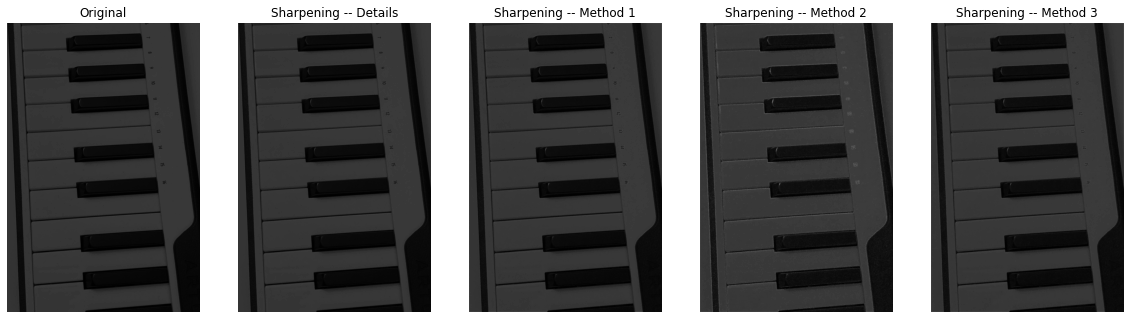

In [20]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=[20, 6])
ax1.set_title("Original")
ax2.set_title("Sharpening -- Details")
ax3.set_title("Sharpening -- Method 1")
ax4.set_title("Sharpening -- Method 2")
ax5.set_title("Sharpening -- Method 3")

emax = max(details.max(), edges.max(), edges2.max(), edges3.max())
emin = min(details.min(), edges.min(), edges2.min(), edges3.min())

im1 = ax1.imshow(cat_img, cmap="gray", vmax=cat_img.max()+emax, vmin=cat_img.min()+emin)
im2 = ax2.imshow(cat_img + details, cmap="gray", vmax=cat_img.max()+emax, vmin=cat_img.min()+emin)
im3 = ax3.imshow(cat_img + edges, cmap="gray", vmax=cat_img.max()+emax, vmin=cat_img.min()+emin)
im4 = ax4.imshow(cat_img + edges2, cmap="gray", vmax=cat_img.max()+emax, vmin=cat_img.min()+emin)
im5 = ax5.imshow(cat_img + edges3, cmap="gray", vmax=cat_img.max()+emax, vmin=cat_img.min()+emin)

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')
ax5.axis('off')